In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##002 추가학습

In [ ]:
# 002 학습
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# 데이터를 불러오기
data = np.load('/content/drive/MyDrive/지윤/new100/npy/data_002.npy')
target = np.load('/content/drive/MyDrive/지윤/new100/npy/target_002.npy')

num_classes = 100
target_tmp = to_categorical(target)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(data, target_tmp, test_size=0.1, random_state=42, stratify=target)

# 데이터셋 확인
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (18000, 224, 224, 3)
Test set size: (2000, 224, 224, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# 모델 불러오기
model = load_model('/content/drive/MyDrive/지윤/new100/model/100_model8.hdf5')

# 옵션 지정
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/지윤/new100/model/add_model21.hdf5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto')


In [ ]:
# 모델 학습
history=model.fit(X_train, y_train,
                  epochs=100,
                  batch_size=64,
                  callbacks=[checkpoint, early_stopping],
                  validation_split=0.2)

Epoch 1/100
225/225 [==============================] - ETA: 0s - loss: 1.2282 - accuracy: 0.6827
Epoch 1: val_loss improved from inf to 0.69753, saving model to /content/drive/MyDrive/지윤/new100/model/add_model21.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - 84s 330ms/step - loss: 1.2282 - accuracy: 0.6827 - val_loss: 0.6975 - val_accuracy: 0.8092
Epoch 2/100
225/225 [==============================] - ETA: 0s - loss: 1.0678 - accuracy: 0.7118
Epoch 2: val_loss improved from 0.69753 to 0.67821, saving model to /content/drive/MyDrive/지윤/new100/model/add_model21.hdf5
225/225 [==============================] - 67s 300ms/step - loss: 1.0678 - accuracy: 0.7118 - val_loss: 0.6782 - val_accuracy: 0.8158
Epoch 3/100
225/225 [==============================] - ETA: 0s - loss: 0.9650 - accuracy: 0.7344
Epoch 3: val_loss improved from 0.67821 to 0.66037, saving model to /content/drive/MyDrive/지윤/new100/model/add_model21.hdf5
225/225 [==============================] - 69s 306ms/step - loss: 0.9650 - accuracy: 0.7344 - val_loss: 0.6604 - val_accuracy: 0.8194
Epoch 4/100
225/225 [==============================] - ETA: 0s - loss: 0.8998 - accuracy: 0.7476
Epoch 4: val_loss improved from 0.66037 to 0.64976, s

In [ ]:
model.save('/content/drive/MyDrive/지윤/new100/model/add_model22.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#add_model22
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

63/63 [==============================] - 7s 105ms/step - loss: 0.5409 - accuracy: 0.8505
Test accuracy: 85.05%


In [ ]:
model = load_model('/content/drive/MyDrive/지윤/new100/model/add_model21.hdf5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

63/63 [==============================] - 10s 109ms/step - loss: 0.5403 - accuracy: 0.8510
Test accuracy: 85.10%


Minimum Validation Loss: 0.5781


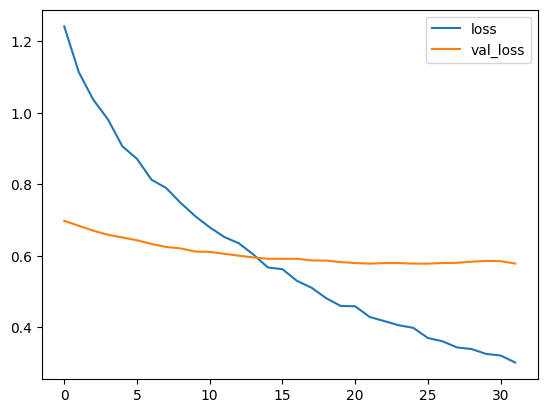

In [ ]:
# 그래프 add1
import matplotlib.pyplot as plt
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))
# val_loss는 처음부터 크지 않았기에 많이 내려가지 않는 거 같음

Minimum Validation Loss: 0.5751


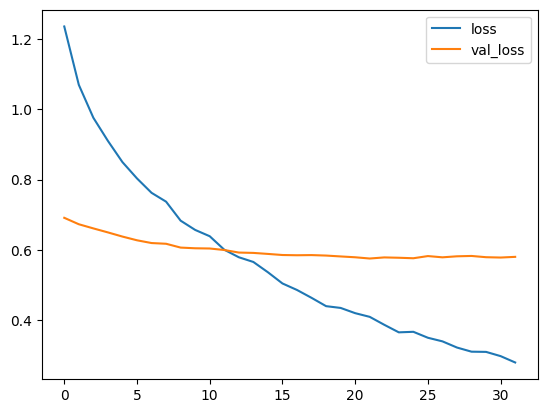

In [ ]:
# 그래프 add2
import matplotlib.pyplot as plt
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))
# compile 제외하고 돌려봄
# 마찬가지

Minimum Validation Loss: 0.5731


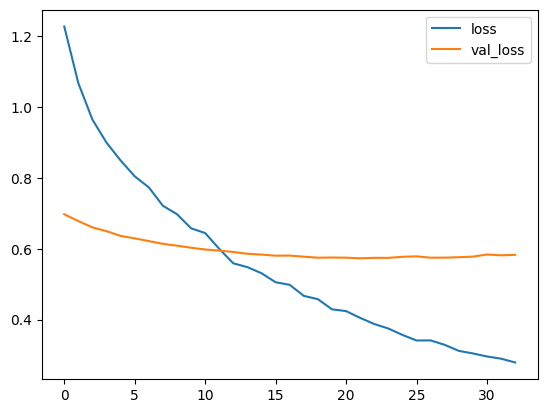

In [ ]:
# 그래프 add21, 22
import matplotlib.pyplot as plt
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))
# test_size 0.1

##003 추가학습

In [ ]:
# 003 학습
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# 데이터를 불러오기
data = np.load('/content/drive/MyDrive/지윤/new100/npy/data_003.npy')
target = np.load('/content/drive/MyDrive/지윤/new100/npy/target_003.npy')

num_classes = 100
target_tmp = to_categorical(target)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(data, target_tmp, test_size=0.1, random_state=42, stratify=target)

# 데이터셋 확인
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (18000, 224, 224, 3)
Test set size: (2000, 224, 224, 3)


In [ ]:
# 003 학습
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# 모델 불러오기
model = load_model('/content/drive/MyDrive/지윤/new100/model/add_model21.hdf5')

# # 모델 컴파일 (기존 설정대로)
# optimizer = Adam(learning_rate=0.0001)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 옵션 지정
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/지윤/new100/model/add_model5.hdf5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto')


In [ ]:
# 모델 학습
history=model.fit(X_train, y_train,
                  epochs=100,
                  batch_size=64,
                  callbacks=[checkpoint, early_stopping],
                  validation_split=0.2)

Epoch 1/100
225/225 [==============================] - ETA: 0s - loss: 1.0223 - accuracy: 0.7307
Epoch 1: val_loss improved from inf to 0.57305, saving model to /content/drive/MyDrive/지윤/new100/model/add_model5.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - 85s 332ms/step - loss: 1.0223 - accuracy: 0.7307 - val_loss: 0.5730 - val_accuracy: 0.8344
Epoch 2/100
225/225 [==============================] - ETA: 0s - loss: 0.8875 - accuracy: 0.7543
Epoch 2: val_loss improved from 0.57305 to 0.56604, saving model to /content/drive/MyDrive/지윤/new100/model/add_model5.hdf5
225/225 [==============================] - 69s 305ms/step - loss: 0.8875 - accuracy: 0.7543 - val_loss: 0.5660 - val_accuracy: 0.8375
Epoch 3/100
225/225 [==============================] - ETA: 0s - loss: 0.8317 - accuracy: 0.7708
Epoch 3: val_loss improved from 0.56604 to 0.55888, saving model to /content/drive/MyDrive/지윤/new100/model/add_model5.hdf5
225/225 [==============================] - 68s 303ms/step - loss: 0.8317 - accuracy: 0.7708 - val_loss: 0.5589 - val_accuracy: 0.8375
Epoch 4/100
225/225 [==============================] - ETA: 0s - loss: 0.7775 - accuracy: 0.7808
Epoch 4: val_loss improved from 0.55888 to 0.54916, sav

In [ ]:
model.save('/content/drive/MyDrive/지윤/new100/model/add_model6.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

63/63 [==============================] - 7s 104ms/step - loss: 0.4718 - accuracy: 0.8680
Test accuracy: 86.80%


In [ ]:
model = load_model('/content/drive/MyDrive/지윤/new100/model/add_model5.hdf5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")
# 이게 높을듯했으나 아니네

63/63 [==============================] - 10s 109ms/step - loss: 0.4746 - accuracy: 0.8650
Test accuracy: 86.50%


Minimum Validation Loss: 0.5319


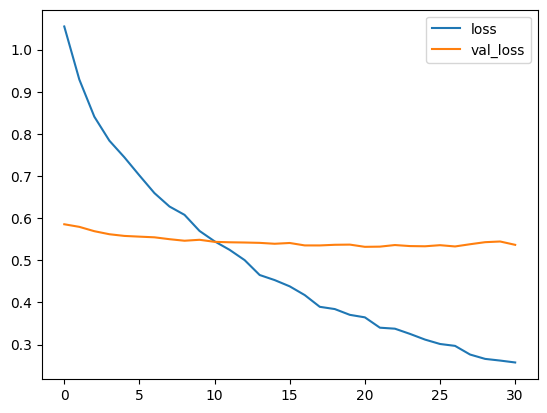

In [ ]:
# 그래프 add_model3
import matplotlib.pyplot as plt
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))
# test_size 0.1 86.15%

Minimum Validation Loss: 0.5523


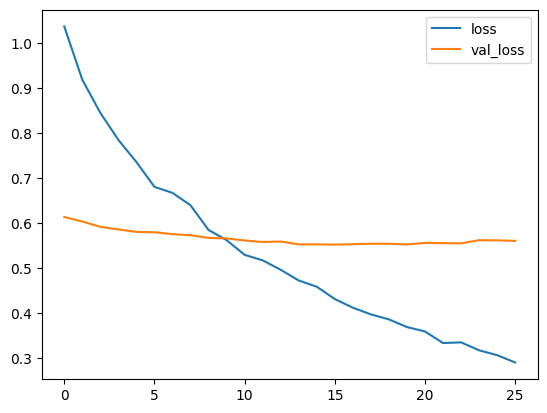

In [ ]:
# 그래프 add_model4
import matplotlib.pyplot as plt
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))
# test_size 0.2

Minimum Validation Loss: 0.5160


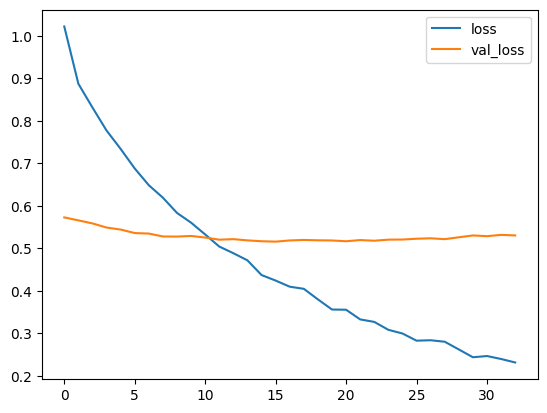

In [ ]:
# 그래프 add_model5,6
import matplotlib.pyplot as plt
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

##005 추가학습

In [ ]:
# 004 학습
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# 데이터를 불러오기
data = np.load('/content/drive/MyDrive/지윤/new100/npy/data_005.npy')
target = np.load('/content/drive/MyDrive/지윤/new100/npy/target_005.npy')

num_classes = 100
target_tmp = to_categorical(target)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(data, target_tmp, test_size=0.1, random_state=42, stratify=target)

# 데이터셋 확인
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (17996, 224, 224, 3)
Test set size: (2000, 224, 224, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

#모델 불러오기
model = load_model('/content/drive/MyDrive/지윤/new100/model/add_model6.hdf5')

# 옵션 지정
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/지윤/new100/model/add_model7.hdf5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto')


In [ ]:
# 모델 학습
history=model.fit(X_train, y_train,
                  epochs=100,
                  batch_size=64,
                  callbacks=[checkpoint, early_stopping],
                  validation_split=0.2)

Epoch 1/100
225/225 [==============================] - ETA: 0s - loss: 0.8817 - accuracy: 0.7648
Epoch 1: val_loss improved from inf to 0.49166, saving model to /content/drive/MyDrive/지윤/new100/model/add_model7.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - 86s 333ms/step - loss: 0.8817 - accuracy: 0.7648 - val_loss: 0.4917 - val_accuracy: 0.8611
Epoch 2/100
225/225 [==============================] - ETA: 0s - loss: 0.7586 - accuracy: 0.7847
Epoch 2: val_loss improved from 0.49166 to 0.48035, saving model to /content/drive/MyDrive/지윤/new100/model/add_model7.hdf5
225/225 [==============================] - 68s 302ms/step - loss: 0.7586 - accuracy: 0.7847 - val_loss: 0.4803 - val_accuracy: 0.8636
Epoch 3/100
225/225 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.8014
Epoch 3: val_loss improved from 0.48035 to 0.47270, saving model to /content/drive/MyDrive/지윤/new100/model/add_model7.hdf5
225/225 [==============================] - 68s 304ms/step - loss: 0.6917 - accuracy: 0.8014 - val_loss: 0.4727 - val_accuracy: 0.8697
Epoch 4/100
225/225 [==============================] - ETA: 0s - loss: 0.6305 - accuracy: 0.8174
Epoch 4: val_loss improved from 0.47270 to 0.46869, sav

In [ ]:
model.save('/content/drive/MyDrive/지윤/new100/model/add_model8.hdf5')

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

63/63 [==============================] - 7s 103ms/step - loss: 0.4312 - accuracy: 0.8825
Test accuracy: 88.25%


In [ ]:
model = load_model('/content/drive/MyDrive/지윤/new100/model/add_model7.hdf5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")
# 이게 높을듯했으나 아니네

63/63 [==============================] - 10s 107ms/step - loss: 0.4284 - accuracy: 0.8805
Test accuracy: 88.05%


Minimum Validation Loss: 0.4506


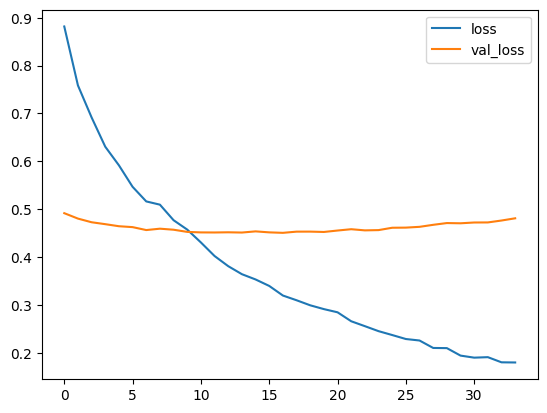

In [ ]:
# 그래프
import matplotlib.pyplot as plt
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

##004 추가학습

In [ ]:
# 004 학습
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# 데이터를 불러오기
data = np.load('/content/drive/MyDrive/지윤/new100/npy/data_004.npy')
target = np.load('/content/drive/MyDrive/지윤/new100/npy/target_004.npy')

num_classes = 100
target_tmp = to_categorical(target)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(data, target_tmp, test_size=0.1, random_state=42, stratify=target)

# 데이터셋 확인
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (18000, 224, 224, 3)
Test set size: (2000, 224, 224, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

#모델 불러오기
model = load_model('/content/drive/MyDrive/지윤/new100/model/add_model7.hdf5')

# 옵션 지정
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/지윤/new100/model/add_model12.hdf5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto')


In [ ]:
# 모델 학습
history=model.fit(X_train, y_train,
                  epochs=100,
                  batch_size=64,
                  callbacks=[checkpoint, early_stopping],
                  validation_split=0.2)

In [ ]:
model.save('/content/drive/MyDrive/지윤/new100/model/add_model_13.hdf5')

In [ ]:
model = load_model('/content/drive/MyDrive/지윤/new100/model/add_model12.hdf5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


63/63 [==============================] - 9s 107ms/step - loss: 0.4101 - accuracy: 0.8780
Test accuracy: 87.80%


# 클래스별 성능 test

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix

model = load_model('/content/drive/MyDrive/지윤/new100/model/add_model13.hdf5')

y_test_labels = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# 클래스별 정확도 계산
class_accuracies = {}

# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# 각 클래스별로 정확도 계산
for i in range(conf_matrix.shape[0]):
    true_positives = conf_matrix[i, i]
    total_samples = np.sum(conf_matrix[i, :])
    accuracy = true_positives / total_samples
    class_accuracies[i] = accuracy

# 클래스 이름과 인덱스를 로드
class_indices_df = pd.read_csv('/content/drive/MyDrive/지윤/new100/npy/class_001.csv')

# 클래스 인덱스와 정확도를 매핑
accuracies_list = []
for class_index, accuracy in class_accuracies.items():
    class_name = class_indices_df[class_indices_df['Class Index'] == class_index]['Class Name'].values[0]
    accuracies_list.append([class_name, class_index, accuracy])

# 데이터프레임 생성
accuracies_df = pd.DataFrame(accuracies_list, columns=['Class Name', 'Class Index', 'Accuracy'])
accuracies_df

63/63 [==============================] - 9s 107ms/step


,Class Name,Class Index,Accuracy
0,가지,0,0.80
1,감자스프,1,0.95
2,감,2,1.00
3,게맛살,3,0.95
4,거봉포도,4,0.90
...,...,...,...
95,후라이드치킨,95,1.00
96,후랑크소시지,96,1.00
97,호두파이,97,0.90
98,떡볶이,98,0.90


In [ ]:
# 데이터프레임 저장
accuracies_df.to_csv('/content/drive/MyDrive/지윤/new/final_df.csv', index=False)

print("성공적으로 저장되었습니다!")

성공적으로 저장되었습니다!
